**Calculate Dxy p values using a resampling test all S. cerevisiae strains (Peter et al., 2018) and European S. paradoxus (Bergstrom et al., 2014) + North American S. paradoxus subpopulation B (Durand et al., 2019).**

In [7]:
import pandas as pd
import numpy as np
import csv
from resample import resample_med

In [8]:
#essential genes - from Winzeler et al., 1999
essential = pd.read_csv('/Users/clairedubin/sacc/external_datasets/essential.csv', header=None)
essential[1] = essential[1].str.strip('\t')
essential_genes = [i.split(' ')[0] for i in essential[1]]

In [9]:
gene_dict = {'YLR397C':'AFG2',
             'YGR098C':'ESP1',
             'YMR168C':'CEP3',
             'YKR054C': 'DYN1',
             'YHR023W':'MYO1',
             'YDR180W':'SCC2',
             'YPL174C':'NIP100',
             'YCR042C': 'TAF2',
             'YMR016C':'SOK2',
             'YJR135C':'MCM22',
             'YJL025W':'RRN7',
             'YDR443C':'SSN2',
             'YKL134C':'OCT1',
            'YPR164W':'MMS1'}

In [13]:
#load raw dxy data

df = pd.read_csv('/Users/clairedubin/sacc/carly_genes/dxy_allScer_allSpar.csv', header=None)
df.columns = ['gene', 'dxy', 'spar_strain_count', 'scer_strain_count']
df['gene'] = df['gene'].str.strip('sacc/1011Scer_allSpar_aligned/').str.strip('.muscle_afa')
df.head()

,gene,dxy,spar_strain_count,scer_strain_count
0,YAL033W,0.074739,20,1011
1,YAL008W,0.114887,20,1011
2,YAL007C,0.075005,19,1011
3,YAL009W,0.066264,20,1011
4,YAL027W,0.118562,19,1011


In [15]:
#drop any rows where strain counts are less than 75% of the total strains for the species

df = df[(df['spar_strain_count']>=20*.75) & (df['scer_strain_count']>=1011*.75)]
df.shape

(4233, 4)

candidate gene median dxy: 0.1215410983310287
essential count: 5; nonessential_count: 8
resampling pool size: 4233
p = 0.0056


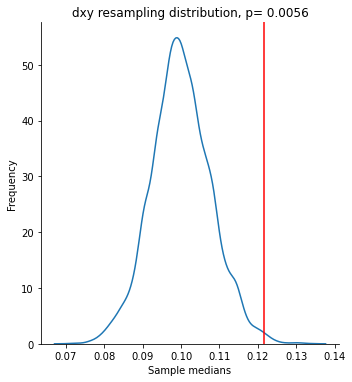

In [11]:
np.random.seed(1)

candidates = df[df['gene'].isin(gene_dict.keys())]

p = resample_med(candidates, df, 'dxy', essential_genes, direction='greater_than', graph=True)

In [12]:
df['dxy'].median()

0.1015970149998918